**Q3. Using the data given below, perform linear regression and polynomial regression as shown at https://realpython.com/linear-regression-in-python/, or use any other tool you are familiar in using.**

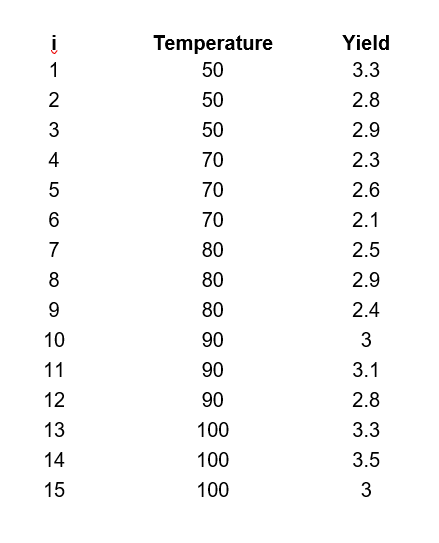

***

In [1]:
# define arrays
temp = [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100]
yield_val = [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3, 3.1, 2.8, 3.3, 3.5, 3]

# verify lengths are the same
print(f'{len(temp)} == {len(yield_val)}')

15 == 15


In [3]:
# Aggregate yield values by temperature
temp_yield_agg = {}
for t, y in zip(temp.flatten(), yield_val):
    if t not in temp_yield_agg:
        temp_yield_agg[t] = 0
    temp_yield_agg[t] += y

# Prepare data for pie chart
labels = list(temp_yield_agg.keys())
sizes = list(temp_yield_agg.values())

# Create a pie chart
plt.figure(figsize=[8,8])
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Aggregated Yield Values by Temperature')
plt.show()

AttributeError: 'list' object has no attribute 'flatten'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# lets set up the necessary tools now

# alter array deminsions
temp = np.array(temp).reshape(-1, 1)

# define the model
model = LinearRegression()
temp_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(temp)

# fit the model
model.fit(temp, yield_val)
model_ = LinearRegression(fit_intercept=False).fit(temp_, yield_val)

In [6]:
r_sq = model.score(temp, yield_val)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

r_sq = model_.score(temp_, yield_val)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_.intercept_}")
print(f"coeffecients: {model_.coef_}")

coefficient of determination: 0.09241764560913446
intercept: 2.306306306306306
slope: [0.00675676]
coefficient of determination: 0.6732052768464252
intercept: 0.0
coeffecients: [ 7.96048110e+00 -1.53711340e-01  1.07560137e-03]


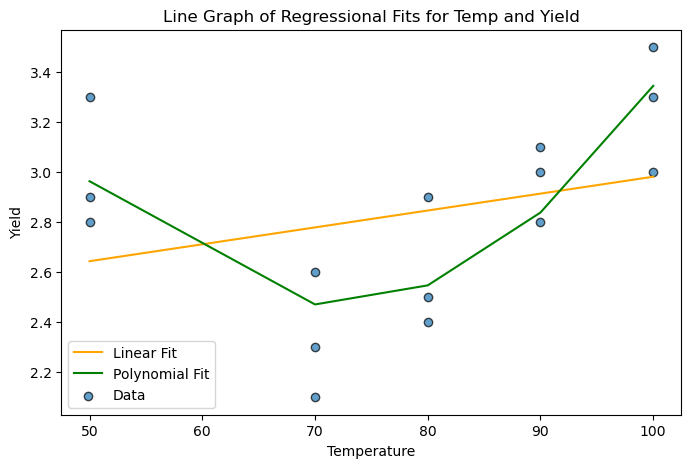

In [7]:
plt.figure(figsize=[8,5])
plt.plot(temp, model.predict(temp), color='orange')
plt.plot(temp, model_.predict(temp_), color='green')
plt.scatter(temp, yield_val, alpha=0.7, edgecolor='black')
plt.legend(['Linear Fit','Polynomial Fit',  'Data'])
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Line Graph of Regressional Fits for Temp and Yield')
plt.show()

In [8]:
z = [12, 25, 7, 5, 10, 23, 5, 6, 27, 3, 13, 13, 10, 18, 5]
z1 = [12, 25, 7, 5, 10, 23, 5, 6, 27, 3*2, 13, 13, 10, 18, 5]
z2 = [12, 25, 7, 5, 10, 23, 5, 6, 27, 3*20, 13, 13, 10, 18, 5]
z =np.array(z)
z1 = np.array(z1)
z2 = np.array(z2)

In [6]:
print(f'mean: {z.mean()}')
print(f'median: {np.median(z)}')
print(f'count: {np.count_nonzero(z)}')
print(f'min: {z.min()}')
print(f'max: {z.max()}')
print(f'range: {z.max() - z.min()}')
print(f'S.D.: {z.std()}')
print(f'Variance: {z.var()}')


mean: 15.933333333333334
median: 12.0
count: 15
min: 5
max: 60
range: 55
S.D.: 13.762105782021717
Variance: 189.39555555555555


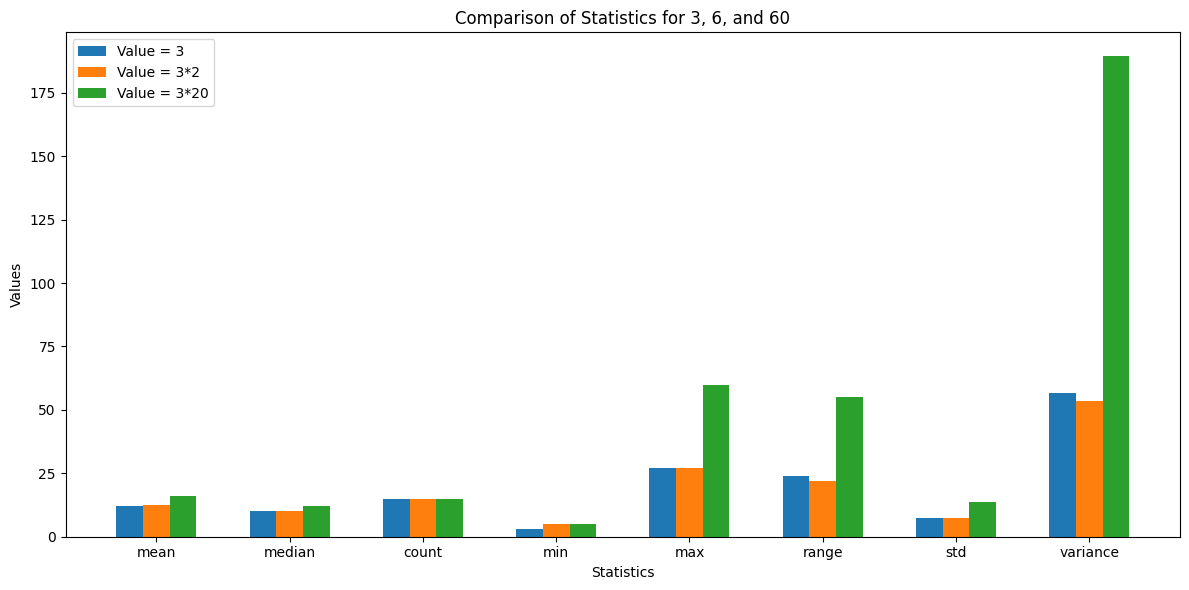

In [21]:
# Function to calculate statistics
def calculate_stats(arr):
    return {
        'mean': arr.mean(),
        'median': np.median(arr),
        'count': np.count_nonzero(arr),
        'min': arr.min(),
        'max': arr.max(),
        'range': arr.max() - arr.min(),
        'std': arr.std(),
        'variance': arr.var()
    }

# Calculate statistics for z, z1, and z2
stats_z = calculate_stats(z)
stats_z1 = calculate_stats(z1)
stats_z2 = calculate_stats(z2)

# Prepare data for bar chart
labels = ['mean', 'median', 'count', 'min', 'max', 'range', 'std', 'variance']
z_values = [stats_z[label] for label in labels]
z1_values = [stats_z1[label] for label in labels]
z2_values = [stats_z2[label] for label in labels]

# Plot bar chart comparison
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=[12, 6])
rects1 = ax.bar(x - width, z_values, width, label='Value = 3')
rects2 = ax.bar(x, z1_values, width, label='Value = 3*2')
rects3 = ax.bar(x + width, z2_values, width, label='Value = 3*20')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Statistics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Statistics for 3, 6, and 60')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [7]:
# Calculate Interquartile Range (IQR) using numpy
z_ = np.sort(z)
q1 = np.percentile(z_, 25)
q3 = np.percentile(z_, 75)
iqr = q3 - q1

# Calculate Quartile Deviation
quartile_deviation = (q3 - q1) / 2

print("Interquartile Range (IQR):", iqr)
print("Quartile Deviation:", quartile_deviation)
print(q1)
print(q3)
print(z_)

Interquartile Range (IQR): 14.0
Quartile Deviation: 7.0
6.5
20.5
[ 5  5  5  6  7 10 10 12 13 13 18 23 25 27 60]


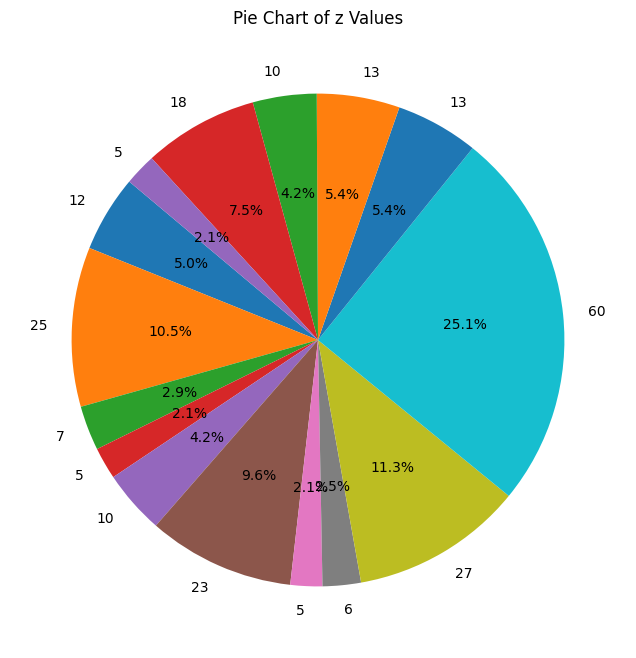

In [16]:
# Create a pie chart for the z array
plt.figure(figsize=[8,8])
plt.pie(z, labels=z, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of z Values')
plt.show()

C:\Users\jcing\AppData\Local\Temp\ipykernel_15236\4105217305.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=sorted(data.keys()))


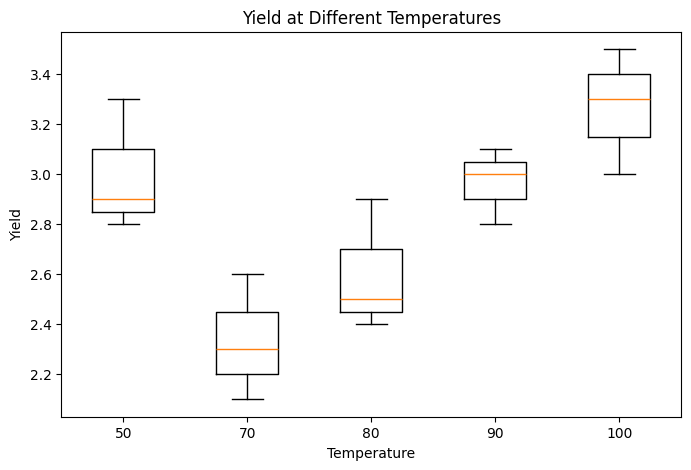

In [11]:
# Create a dictionary to group yield values by temperature
data = {}
for t, y in zip(temp, yield_val):
    if t not in data:
        data[t] = []
    data[t].append(y)

# Prepare data for boxplot
boxplot_data = [data[t] for t in sorted(data.keys())]

plt.figure(figsize=[8,5])
plt.boxplot(boxplot_data, labels=sorted(data.keys()))
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Yield at Different Temperatures')
plt.show()

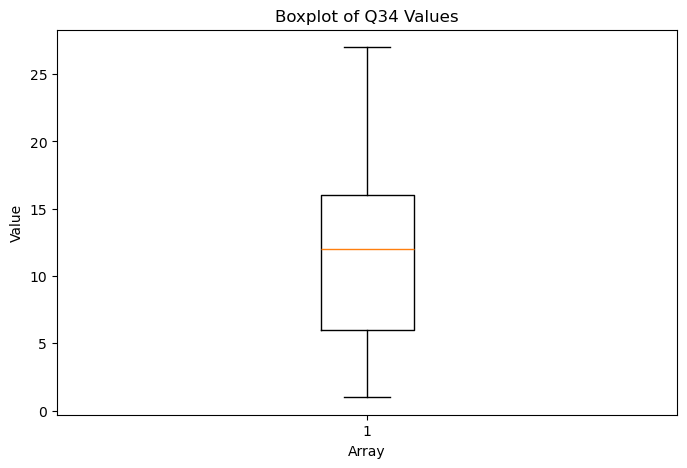

In [11]:
exam = [ 12, 20, 7, 5, 10, 23, 1, 14, 27, 3, 13, 13, 9, 18, 5]



plt.figure(figsize=[8,5])
plt.boxplot(exam)
plt.xlabel('Array')
plt.ylabel('Value')
plt.title('Boxplot of Q34 Values')
plt.show()

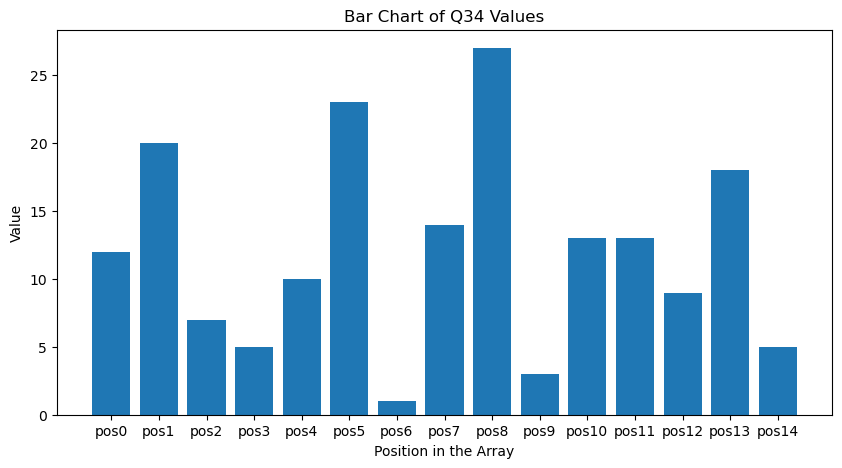

In [14]:
exam = [ 12, 20, 7, 5, 10, 23, 1, 14, 27, 3, 13, 13, 9, 18, 5]
pos = []
for item in range(0,len(exam)):
    pos.append(f'pos{item}')

plt.figure(figsize=[10,5])
plt.bar(pos, exam)
plt.xlabel('Position in the Array')
plt.ylabel('Value')
plt.title('Bar Chart of Q34 Values')
plt.show()